In [1]:
from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn import  svm
from sklearn import metrics

In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(r'C:\Users\kelvin\Downloads\income.csv')
df =sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df['species'] =df['species'].replace({'setosa':0,'versicolor':2,'virginica':3})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


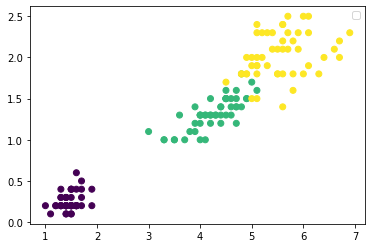

In [5]:
plt.scatter(df["petal_length"],df['petal_width'],c = df['species'],cmap='viridis')
plt.legend()

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


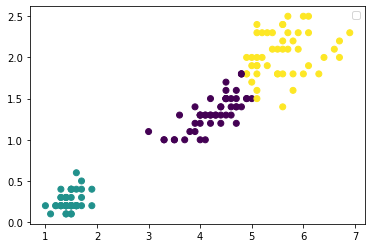

In [8]:
df['cluster'] = y_predicted
plt.scatter(df["petal_length"],df['petal_width'],c = df['cluster'],cmap='viridis')
plt.legend()

In [9]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


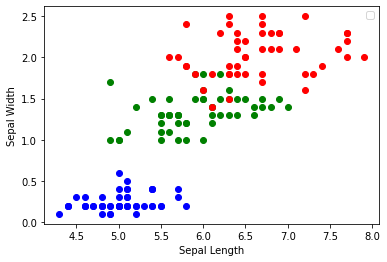

In [10]:
plt.scatter(df1.sepal_length,df1['petal_width'],color='green')
plt.scatter(df2.sepal_length,df2['petal_width'],color='blue')
plt.scatter(df3.sepal_length,df3['petal_width'],color='red')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend();

In [11]:
scaler = MinMaxScaler()
sep =scaler.fit_transform(df[['petal_length']])

scaler = MinMaxScaler()
swid =scaler.fit_transform(df[['petal_width']])

df['PetalLength'] = sep
df['PetalWidth'] =swid
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2,0,1,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,1,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,1,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,1,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,1,0.067797,0.041667
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3,2,0.711864,0.916667
146,6.3,2.5,5.0,1.9,3,2,0.677966,0.750000
147,6.5,3.0,5.2,2.0,3,2,0.711864,0.791667
148,6.2,3.4,5.4,2.3,3,2,0.745763,0.916667


In [12]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
df['cluter'] = y_predicted

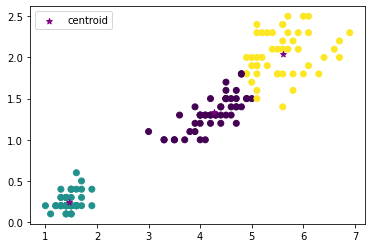

In [14]:
df['cluter'] = y_predicted
plt.scatter(df["petal_length"],df['petal_width'],c = df['cluster'],cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*',label='centroid')

plt.legend();

In [15]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
sse

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.465989010989013,
 13.91690875790876,
 11.070652341896281,
 9.212104827285605,
 7.716338763575607,
 6.561642857142857]

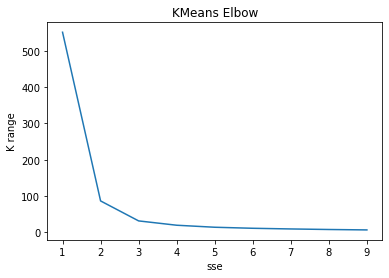

In [17]:
plt.title('KMeans Elbow')
plt.xlabel('sse')
plt.ylabel('K range')
plt.plot(k_rng,sse);

In [18]:
da = df[['petal_length','petal_width']]
da

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300 ,n_init=10 ,random_state=42)
    kmeans.fit(da) 
    silhouette_avg.append(kmeans.inertia_)

silhouette_avg

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.91690875790876,
 11.057257664362927,
 9.281343349632824,
 7.669666305916307,
 6.622500000000001,
 5.574284847718352]

In [20]:
from sklearn.metrics import silhouette_score

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300 ,n_init=10 ,random_state=42)
    kmeans.fit(da)
    cluster_labels = kmeans.labels_
    
    score=silhouette_score(da, cluster_labels)
score

0.4212493808368149

In [21]:
import numpy as np
kmeans_per_k = [KMeans(n_clusters =k,random_state =42).fit(da) for k in range(1,10)]

silhoutte_score = [silhouette_score(da,model.labels_)
                   for model in kmeans_per_k[1:]]

silhoutte_score

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0.7653904101383076,
 0.6604800085022658,
 0.6127580795614039,
 0.588373271407563,
 0.5762928191225791,
 0.5640984344798261,
 0.5902255629729695,
 0.570862059468037]

In [22]:
from pylab import rcParams

C:\Users\kelvin\AppData\Local\Temp\ipykernel_6616\2261849888.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",
findfont: Font family ['Aerial'] not found. Falling back to DejaVu Sans.


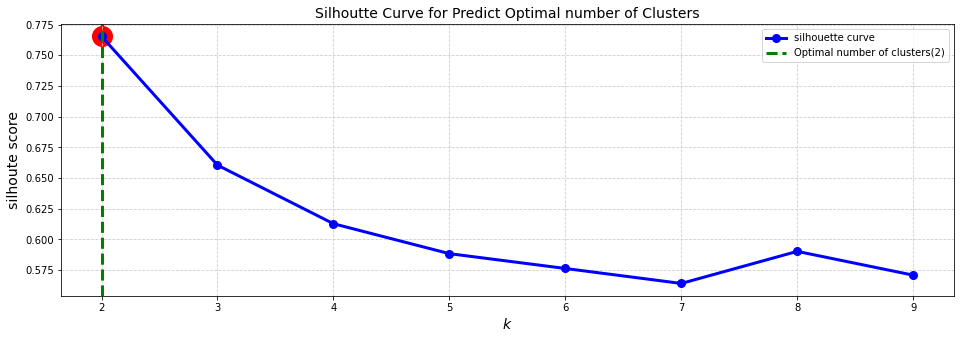

In [23]:
rcParams['figure.figsize'] = 16,5
plt.plot(range(2,10),silhoutte_score,"bo-",color="blue",
        linewidth=3,markersize=8,label="silhouette curve")
plt.xlabel('$k$',fontsize=14,family='Aerial')
plt.ylabel('silhoute score',fontsize=14,family='Aerial')
plt.grid(which='major',color='#cccccc',linestyle='--')
plt.title('Silhoutte Curve for Predict Optimal number of Clusters',family='Aerial',fontsize=14)

k = np.argmax(silhoutte_score) + 2
plt.axvline(x=k, linestyle ='--', c='green',linewidth=3,label='Optimal number of clusters({})'.format(k))
plt.scatter(k,silhoutte_score[k-2],c='red',s=400)
plt.legend()
plt.show()

youtube:number of clusters in KMeans silhoutte score

In [24]:
cluster_labels.shape
kmeans.labels_.shape
silhouette_avg

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.91690875790876,
 11.057257664362927,
 9.281343349632824,
 7.669666305916307,
 6.622500000000001,
 5.574284847718352]

In [25]:
silhouette_avg

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.91690875790876,
 11.057257664362927,
 9.281343349632824,
 7.669666305916307,
 6.622500000000001,
 5.574284847718352]

In [26]:
pd.DataFrame(y_predicted).value_counts()

0    52
1    50
2    48
dtype: int64

Method 2

In [27]:
def wrangle(filepath):
    df= pd.read_csv(filepath)
    
    df["Code"]=df["Species"]
    
    df["Code"].replace('setosa', 0, inplace=True) 
    df["Code"].replace('versicolor', 1, inplace=True) 
    df["Code"].replace('virginica', 2, inplace=True) 
    
    return df

In [28]:
df = wrangle(r"C:\Users\kelvin\OneDrive\Desktop\iriswqa.csv")
print(df.shape)
df.tail()

(190, 6)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,Code
185,6.3,2.7,4.9,1.8,virginica,2
186,6.7,3.3,5.7,2.1,virginica,2
187,7.2,3.2,6.0,1.8,virginica,2
188,6.2,2.8,4.8,1.8,virginica,2
189,6.1,3.0,4.9,1.8,virginica,2


In [29]:
X = df[["Petal_Length","Petal_Width"]]
print(X.shape)
X.head()

(190, 2)


,Petal_Length,Petal_Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [30]:
model = KMeans(n_clusters = 3,random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [31]:
labels = model.labels_
labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

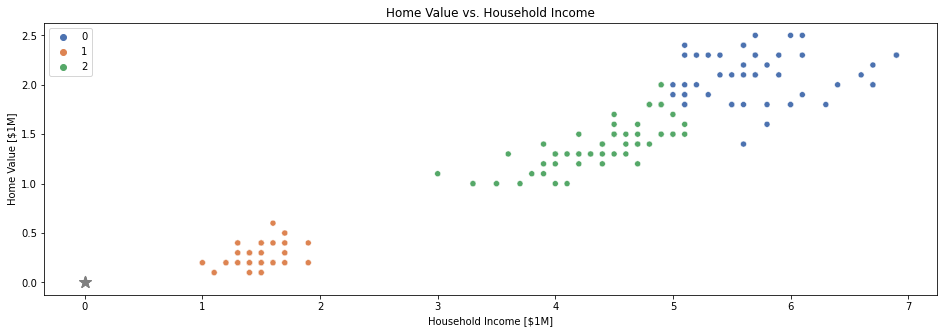

In [32]:
sns.scatterplot(
    x=df["Petal_Length"], y=df["Petal_Width"], hue=model.labels_, palette="deep"
)
plt.scatter(
    model.cluster_centers_[:, 0] / 1e6, model.cluster_centers_[:, 1] / 1e6, color="gray", marker="*", s=150
)

plt.xlabel("Household Income [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Home Value vs. Household Income");

In [33]:
inertia = model.inertia_
inertia

38.43924414808118

In [34]:
centroids =model.cluster_centers_
centroids

array([[5.725     , 2.07708333],
       [1.46455696, 0.24683544],
       [4.38730159, 1.41428571]])

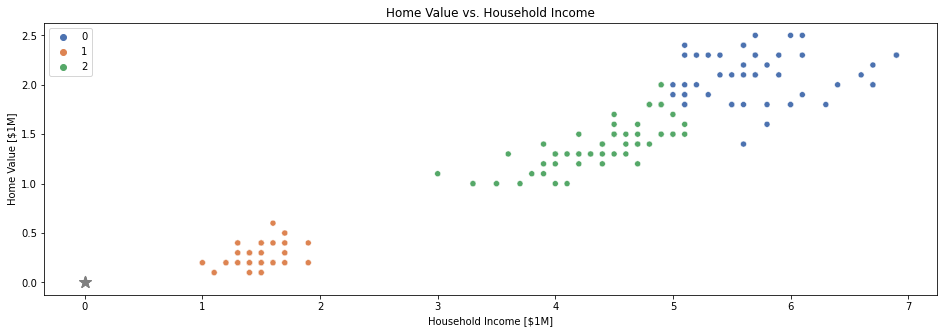

In [35]:
sns.scatterplot(
    x=df["Petal_Length"], y=df["Petal_Width"], hue=model.labels_, palette="deep"
)
plt.scatter(
    centroids[:, 0] / 1e6, centroids[:, 1] / 1e6, color="gray", marker="*", s=150
)

plt.xlabel("Household Income [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Home Value vs. Household Income");

In [36]:
ss = silhouette_score(X, model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.681636177581048


In [37]:
n_clusters = range(2, 20)
inertia_errors = []
silhouette_scores = []

In [38]:
n_clusters = range(2, 20)
inertia_errors = []
silhouette_scores = []

for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(X, model.labels_))
    print(inertia_errors)
    print(silhouette_scores)

[97.9404659090909]
[0.7897187994232377]
[97.9404659090909, 38.43924414808118]
[0.7897187994232377, 0.681636177581048]
[97.9404659090909, 38.43924414808118, 22.97303348853]
[0.7897187994232377, 0.681636177581048, 0.6529453168451368]
[97.9404659090909, 38.43924414808118, 22.97303348853, 16.86870031626699]
[0.7897187994232377, 0.681636177581048, 0.6529453168451368, 0.6368443791641053]
[97.9404659090909, 38.43924414808118, 22.97303348853, 16.86870031626699, 12.95339184370913]
[0.7897187994232377, 0.681636177581048, 0.6529453168451368, 0.6368443791641053, 0.6349312781621786]
[97.9404659090909, 38.43924414808118, 22.97303348853, 16.86870031626699, 12.95339184370913, 11.102908025467874]
[0.7897187994232377, 0.681636177581048, 0.6529453168451368, 0.6368443791641053, 0.6349312781621786, 0.6273336007137708]
[97.9404659090909, 38.43924414808118, 22.97303348853, 16.86870031626699, 12.95339184370913, 11.102908025467874, 9.545689817178157]
[0.7897187994232377, 0.681636177581048, 0.6529453168451368, 

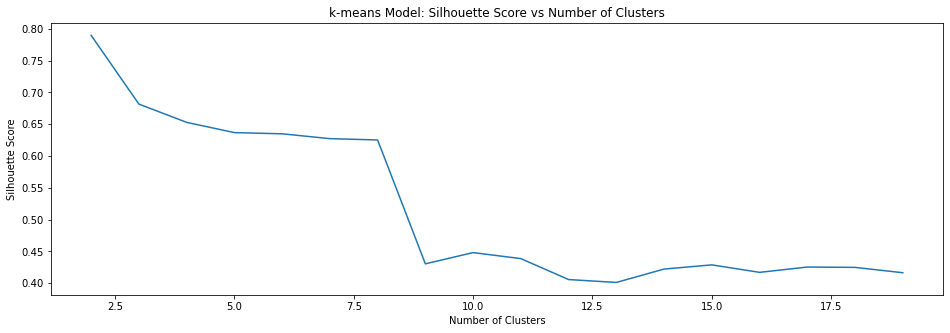

In [39]:
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("k-means Model: Silhouette Score vs Number of Clusters");

In [40]:
final_model = KMeans(n_clusters = 2,random_state = 42)
# Fit model to data
final_model.fit(X)

KMeans(n_clusters=2, random_state=42)

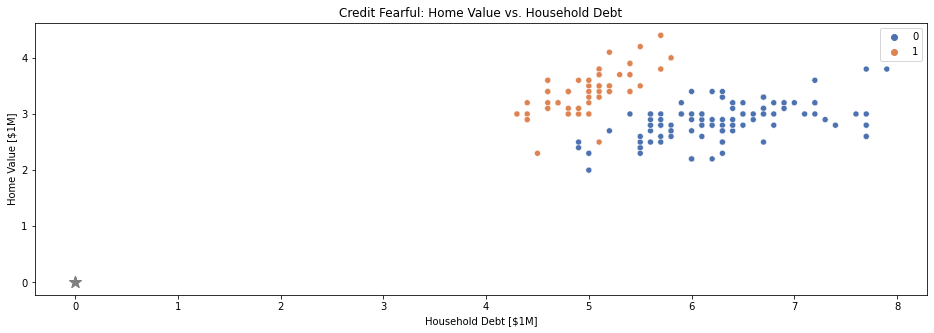

In [41]:
centroids = final_model.cluster_centers_
sns.scatterplot(x =df["Sepal_Length"],
                y = df["Sepal_Width"],
                hue = final_model.labels_,
              palette ="deep")
plt.scatter(
    x = centroids[:,0]/1e6, y= centroids[:,1]/1e6,
    color = "gray",
    marker = "*", s= 150
)
plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

In [42]:
ss = silhouette_score(X, final_model.labels_)
print("Silhouette Score (3 clusters):", ss)

Silhouette Score (3 clusters): 0.7897187994232377


In [43]:
inertia = final_model.inertia_
inertia

97.9404659090909

In [44]:
xgb = X.groupby(final_model.labels_).mean()
xgb

,Petal_Length,Petal_Width
0,4.983636,1.706364
1,1.483750,0.257500


In [45]:
final_model.cluster_centers_

array([[4.98363636, 1.70636364],
       [1.48375   , 0.2575    ]])

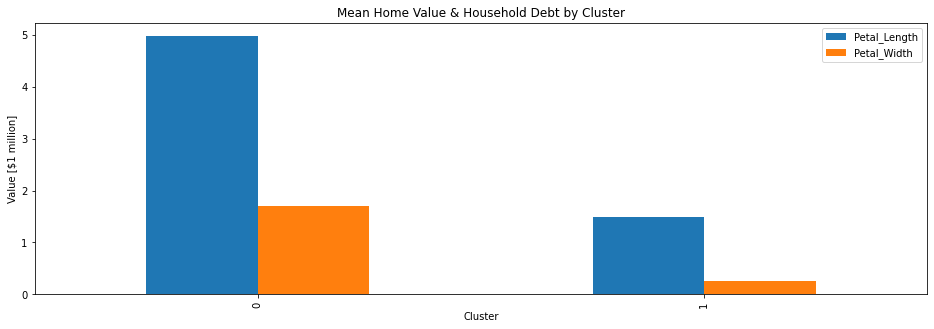

In [46]:
xgb.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

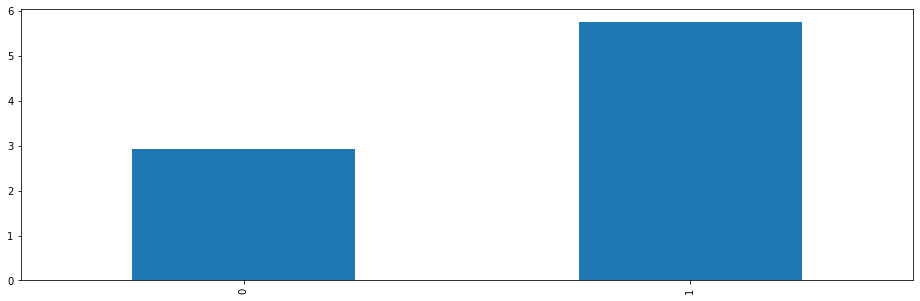

In [47]:
(xgb["Petal_Length"]/xgb["Petal_Width"]).plot(kind="bar");

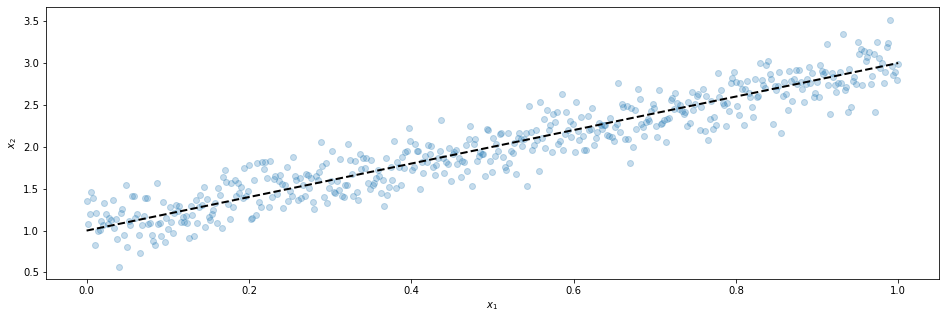

In [48]:
import numpy as np

np.random.seed(0)
x1 = np.linspace(0, 1, 500)
x2 = 2 * x1 + 1 + 0.2 * np.random.randn(500)
X = np.vstack((x1, x2)).T

plt.scatter(*X.T, alpha=0.25)
plt.plot(x1, 2 * x1 + 1, "--k", linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

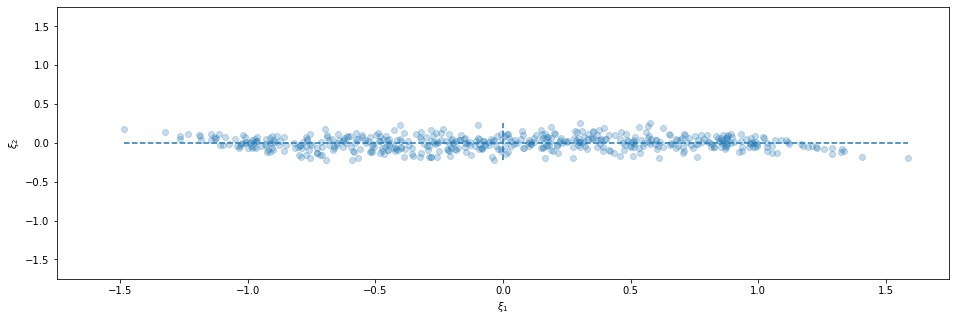

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Xt = pca.fit_transform(X)

xi_1_max, xi_2_max = Xt.max(axis=0)
xi_1_min, xi_2_min = Xt.min(axis=0)

plt.hlines(0, xi_1_min, xi_1_max, linestyles="--")
plt.vlines(0, xi_2_min, xi_2_max, linestyles="--")

plt.scatter(*Xt.T, alpha=0.25)
plt.xlim([-1.75, 1.75])
plt.ylim([-1.75, 1.75])
plt.xlabel("$\\xi _1$")
plt.ylabel("$\\xi _2$");

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define trained data
df = wrangle(r"C:\Users\kelvin\OneDrive\Desktop\iriswqa.csv")
X = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
pca = PCA(n_components=2)

# Fit and transform data
Xt = pca.fit_transform(X_scaled)

print("Number of dimension before reduction:", X_scaled.shape[-1])
print("Number of dimension after reduction:", Xt.shape[-1])

Number of dimension before reduction: 4
Number of dimension after reduction: 2
